In [52]:
import pandas as pd
import seaborn as sns
import scipy
import numpy as np
from scipy.stats import chi2_contingency
import matplotlib.pyplot as plt
from datetime import datetime

In [53]:
df = pd.read_csv("Fire_Incidents.csv")[367780:371369 :]
# pd.set_option('display.max_rows', None)

C:\Users\rhani\AppData\Local\Temp\ipykernel_8280\3794535261.py:1: DtypeWarning: Columns (11,12,19,37,44,58) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("Fire_Incidents.csv")[367780:371369 :]


In [54]:
df

IncidentNumber  ExposureNumber                 Address IncidentDate  \
367780        15051151               0       545 Powell Street   05/15/2015   
367781        15078365               0    180 Huntington Drive   07/25/2015   
367782        15078908               0  910 Connecticut Street   07/26/2015   
367783        15127232               0       207 Powell Street   11/27/2015   
367784        15132254               0   Kansas St/23rd Street   12/10/2015   
...                ...             ...                     ...          ...   
371364         5028070               0         156 Langton St.   04/15/2005   
371365         5015551               0          1668 Great Hy.   02/26/2005   
371366        10055285               0     1840 Mcallister St.   06/24/2010   
371367         8074467               0        319 Buchanan St.   08/30/2008   
371368        16049291               0  1933 Mcallister Street   05/03/2016   

        CallNumber               AlarmDtTm             ArrivalDtTm  \
367780   151350513  05/15/2015 05:41:04 AM  05/15/2015 05:47:18 AM   
367781   152060513  07/25/2015 03:50:39 AM  07/25/2015 03:58:40 AM   
367782   152072063  07/26/2015 02:34:31 PM  07/26/2015 02:37:23 PM   
367783   153310263  11/27/2015 02:41:19 AM  11/27/2015 02:41:19 AM   
367784   153440127  12/10/2015 01:06:25 AM  12/10/2015 01:11:32 AM   
...            ...                     ...                     ...   
371364    51050045  04/15/2005 05:40:07 AM  04/15/2005 05:43:34 AM   
371365    50570361  02/26/2005 10:03:36 PM  02/26/2005 10:09:46 PM   
371366   101750357  06/24/2010 10:42:52 PM  06/24/2010 10:46:14 PM   
371367    82430048  08/30/2008 02:34:31 AM  08/30/2008 02:40:55 AM   
371368   161243109  05/03/2016 06:44:19 PM  05/03/2016 06:48:29 PM   

                     CloseDtTm           City  Zipcode  ...  \
367780  05/15/2015 06:27:12 AM  San Francisco  94108.0  ...   
367781  07/25/2015 06:46:32 AM  San Francisco  94132.0  ...   
367782  07/26/2015 03:22:02 PM  San Francisco  94107.0  ...   
367783  11/27/2015 02:59:40 AM  San Francisco  94102.0  ...   
367784  12/10/2015 01:52:36 AM  San Francisco  94107.0  ...   
...                        ...            ...      ...  ...   
371364  04/15/2005 08:14:21 AM             SF  94103.0  ...   
371365  02/26/2005 11:54:34 PM             SF      NaN  ...   
371366  06/25/2010 01:07:34 AM             SF  94115.0  ...   
371367  08/30/2008 02:41:34 AM             SF      NaN  ...   
371368  05/03/2016 07:05:56 PM  San Francisco  94117.0  ...   

                            DetectorEffectiveness DetectorFailureReason  \
367780                                        NaN                   NaN   
367781                                        NaN                   NaN   
367782                                        NaN                   NaN   
367783                                        NaN                   NaN   
367784                                        NaN                   NaN   
...                                           ...                   ...   
371364                                          -                     -   
371365                                          -                     -   
371366  1 -alerted occupants, occupants responded                     -   
371367                                        NaN                   NaN   
371368                                        NaN                   NaN   

       AutomaticExtinguishingSystemPresent  AutomaticExtinguishingSytemType  \
367780                                 NaN                              NaN   
367781                                 NaN                              NaN   
367782                                 NaN                              NaN   
367783                                 NaN                              NaN   
367784                                 NaN                              NaN   
...                                    ...                              ...   
371364 

In [56]:
columns_to_drop = ["IncidentNumber", "ExposureNumber", "CallNumber", "Address", "City", "FirstUnitOnScene", "NumberofAlarms", "MutualAid", "ActionTakenSecondary", "ActionTakenOther", "DetectorAlertedOccupants", "IgnitionFactorSecondary", "StructureType", "FloorofFireOrigin", "FireSpread", "NoFlameSpead", "Numberoffloorswithminimumdamage", "Numberoffloorswithsignificantdamage", "Numberoffloorswithheavydamage", "Numberoffloorswithextremedamage", "DetectorEffectiveness", "DetectorFailureReason", "AutomaticExtinguishingSytemType", "AutomaticExtinguishingSytemPerfomance", "AutomaticExtinguishingSytemFailureReason", "NumberofSprinklerHeadsOperating", "Location", "FireFatalities"]

In [57]:
df = df.drop(columns_to_drop,  axis=1)

In [58]:
df

IncidentDate               AlarmDtTm             ArrivalDtTm  \
367780   05/15/2015  05/15/2015 05:41:04 AM  05/15/2015 05:47:18 AM   
367781   07/25/2015  07/25/2015 03:50:39 AM  07/25/2015 03:58:40 AM   
367782   07/26/2015  07/26/2015 02:34:31 PM  07/26/2015 02:37:23 PM   
367783   11/27/2015  11/27/2015 02:41:19 AM  11/27/2015 02:41:19 AM   
367784   12/10/2015  12/10/2015 01:06:25 AM  12/10/2015 01:11:32 AM   
...             ...                     ...                     ...   
371364   04/15/2005  04/15/2005 05:40:07 AM  04/15/2005 05:43:34 AM   
371365   02/26/2005  02/26/2005 10:03:36 PM  02/26/2005 10:09:46 PM   
371366   06/24/2010  06/24/2010 10:42:52 PM  06/24/2010 10:46:14 PM   
371367   08/30/2008  08/30/2008 02:34:31 AM  08/30/2008 02:40:55 AM   
371368   05/03/2016  05/03/2016 06:44:19 PM  05/03/2016 06:48:29 PM   

                     CloseDtTm  Zipcode Battalion StationArea   Box  \
367780  05/15/2015 06:27:12 AM  94108.0       B01          02  1361   
367781  07/25/2015 06:46:32 AM  94132.0       B08          19  8825   
367782  07/26/2015 03:22:02 PM  94107.0       B10          37  2615   
367783  11/27/2015 02:59:40 AM  94102.0       B03          01  1363   
367784  12/10/2015 01:52:36 AM  94107.0       B10          37  2545   
...                        ...      ...       ...         ...   ...   
371364  04/15/2005 08:14:21 AM  94103.0       B03          08   NaN   
371365  02/26/2005 11:54:34 PM      NaN       B08          23   NaN   
371366  06/25/2010 01:07:34 AM  94115.0       B05          21   NaN   
371367  08/30/2008 02:41:34 AM      NaN       B02          36   NaN   
371368  05/03/2016 07:05:56 PM  94117.0       B05          21  4362   

        SuppressionUnits  SuppressionPersonnel  ...  \
367780                 8                    29  ...   
367781                 2                     9  ...   
367782                 3                    10  ...   
367783                 0                     0  ...   
367784                 1                     4  ...   
...                  ...                   ...  ...   
371364                 0                     0  ...   
371365                11                    37  ...   
371366                10                    36  ...   
371367                 2                     9  ...   
371368                 1                     4  ...   

                                        HeatSource  \
367780                65 lighter: cigarette, cigar   
367781                             uu undetermined   
367782                                         NaN   
367783                                         NaN   
367784                             uu undetermined   
...                                            ...   
371364  60 - heat; other open flame/smoking materi   
371365                     00 - heat source: other   
371366                           uu - undetermined   
371367                           uu - undetermined   
371368                                         NaN   

                                  ItemFirstIgnited  \
367780       92 magazine, newspaper, writing paper   
367781                             uu undetermined   
367782                                         NaN   
367783                                         NaN   
367784                             uu undetermined   
...                                            ...   
371364       11 - exterior roof covering or finish   
371365  76 - cooking materials, inc. edible materi   
371366                50 - storage supplies, other   
371367              00 - item first ignited, other   
371368                                         NaN   

               HumanFactorsAssociatedwithIgnition   StructureStatus  \
367780                                     n none               NaN   
367781                                     n none               NaN   
367782                                        NaN               NaN   
367783                                        NaN         

In [59]:
df = df.dropna()

In [60]:
df

IncidentDate               AlarmDtTm             ArrivalDtTm  \
367808   03/16/2016  03/16/2016 09:09:30 AM  03/16/2016 09:14:49 AM   
367833   04/02/2015  04/02/2015 10:00:35 PM  04/02/2015 10:04:20 PM   
367838   11/10/2015  11/10/2015 11:56:09 PM  11/11/2015 12:01:23 AM   
367849   12/29/2015  12/29/2015 10:35:00 AM  12/29/2015 10:38:21 AM   
367855   06/09/2015  06/09/2015 01:28:55 AM  06/09/2015 01:32:58 AM   
...             ...                     ...                     ...   
371330   06/21/2013  06/21/2013 09:37:01 PM  06/21/2013 09:43:18 PM   
371334   01/14/2014  01/14/2014 06:42:06 PM  01/14/2014 06:46:01 PM   
371337   07/23/2007  07/23/2007 03:18:31 AM  07/23/2007 03:24:54 AM   
371355   08/01/2013  08/01/2013 03:12:06 AM  08/01/2013 03:16:02 AM   
371362   07/08/2013  07/08/2013 08:49:03 AM  07/08/2013 08:50:15 AM   

                     CloseDtTm  Zipcode Battalion StationArea   Box  \
367808  03/16/2016 12:02:44 PM  94103.0       B02          36  3212   
367833  04/03/2015 06:02:37 AM  94133.0       B01          28  1434   
367838  11/11/2015 01:23:57 AM  94109.0       B04          38  3325   
367849  12/29/2015 02:50:49 PM  94122.0       B08          22  7325   
367855  06/09/2015 02:36:15 AM  94114.0       B05          06  5131   
...                        ...      ...       ...         ...   ...   
371330  06/21/2013 10:49:59 PM  94124.0       B10          17  6653   
371334  01/15/2014 01:42:44 AM  94122.0       B08          23  7655   
371337  07/23/2007 04:11:17 AM  94107.0       B03          29  2274   
371355  08/01/2013 04:28:04 AM  94108.0       B01          13  1313   
371362  07/08/2013 12:01:42 PM  94110.0       B06          11  5457   

        SuppressionUnits  SuppressionPersonnel  ...  \
367808                 9                    34  ...   
367833                 9                    33  ...   
367838                 3                    10  ...   
367849                17                    64  ...   
367855                 8                    29  ...   
...                  ...                   ...  ...   
371330                 3                    10  ...   
371334                 9                    31  ...   
371337                 6                    23  ...   
371355                 9                    31  ...   
371362                 6                    23  ...   

                                               HeatSource  \
367808                       65 lighter: cigarette, cigar   
367833                               13 electrical arcing   
367838  60 heat from other open flame or smoking mater...   
367849              10 heat from powered equipment, other   
367855  60 heat from other open flame or smoking mater...   
...                                                   ...   
371330                                  uu - undetermined   
371334                                53 - blasting agent   
371337                                  uu - undetermined   
371355                                  uu - undetermined   
371362              81 - heat; direct flame or convection   

                                     ItemFirstIgnited  \
367808  59 rolled, wound material (paper and fabrics)   
367833           81 electrical wire, cable insulation   
367838             34 wearing apparel not on a person   
367849             34 wearing apparel not on a person   
367855                            31 mattress, pillow   
...                                               ...   
371330                              uu - undetermined   
371334                              uu - undetermined   
371337                              uu - undetermined   
371355          12 - exterior wall covering or finish   
371362                              uu - undetermined   

           HumanFactorsAssociatedwithIgnition   StructureStatus  \
367808                                 n none   2 in normal use   
367833                                 n none   2 in normal use   
367838               

In [61]:
# df["Received Time"] = df["Received DtTm"]
# df["On Scene Time"] = df["On Scene DtTm"]
df['Completion Time'] = (pd.to_datetime(df["CloseDtTm"]) - pd.to_datetime(df["ArrivalDtTm"])).astype('timedelta64[m]')


C:\Users\rhani\AppData\Local\Temp\ipykernel_8280\661312509.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Completion Time'] = (pd.to_datetime(df["CloseDtTm"]) - pd.to_datetime(df["ArrivalDtTm"])).astype('timedelta64[m]')


In [62]:
df

IncidentDate               AlarmDtTm             ArrivalDtTm  \
367808   03/16/2016  03/16/2016 09:09:30 AM  03/16/2016 09:14:49 AM   
367833   04/02/2015  04/02/2015 10:00:35 PM  04/02/2015 10:04:20 PM   
367838   11/10/2015  11/10/2015 11:56:09 PM  11/11/2015 12:01:23 AM   
367849   12/29/2015  12/29/2015 10:35:00 AM  12/29/2015 10:38:21 AM   
367855   06/09/2015  06/09/2015 01:28:55 AM  06/09/2015 01:32:58 AM   
...             ...                     ...                     ...   
371330   06/21/2013  06/21/2013 09:37:01 PM  06/21/2013 09:43:18 PM   
371334   01/14/2014  01/14/2014 06:42:06 PM  01/14/2014 06:46:01 PM   
371337   07/23/2007  07/23/2007 03:18:31 AM  07/23/2007 03:24:54 AM   
371355   08/01/2013  08/01/2013 03:12:06 AM  08/01/2013 03:16:02 AM   
371362   07/08/2013  07/08/2013 08:49:03 AM  07/08/2013 08:50:15 AM   

                     CloseDtTm  Zipcode Battalion StationArea   Box  \
367808  03/16/2016 12:02:44 PM  94103.0       B02          36  3212   
367833  04/03/2015 06:02:37 AM  94133.0       B01          28  1434   
367838  11/11/2015 01:23:57 AM  94109.0       B04          38  3325   
367849  12/29/2015 02:50:49 PM  94122.0       B08          22  7325   
367855  06/09/2015 02:36:15 AM  94114.0       B05          06  5131   
...                        ...      ...       ...         ...   ...   
371330  06/21/2013 10:49:59 PM  94124.0       B10          17  6653   
371334  01/15/2014 01:42:44 AM  94122.0       B08          23  7655   
371337  07/23/2007 04:11:17 AM  94107.0       B03          29  2274   
371355  08/01/2013 04:28:04 AM  94108.0       B01          13  1313   
371362  07/08/2013 12:01:42 PM  94110.0       B06          11  5457   

        SuppressionUnits  SuppressionPersonnel  ...  \
367808                 9                    34  ...   
367833                 9                    33  ...   
367838                 3                    10  ...   
367849                17                    64  ...   
367855                 8                    29  ...   
...                  ...                   ...  ...   
371330                 3                    10  ...   
371334                 9                    31  ...   
371337                 6                    23  ...   
371355                 9                    31  ...   
371362                 6                    23  ...   

                                     ItemFirstIgnited  \
367808  59 rolled, wound material (paper and fabrics)   
367833           81 electrical wire, cable insulation   
367838             34 wearing apparel not on a person   
367849             34 wearing apparel not on a person   
367855                            31 mattress, pillow   
...                                               ...   
371330                              uu - undetermined   
371334                              uu - undetermined   
371337                              uu - undetermined   
371355          12 - exterior wall covering or finish   
371362                              uu - undetermined   

           HumanFactorsAssociatedwithIgnition   StructureStatus  \
367808                                 n none   2 in normal use   
367833                                 n none   2 in normal use   
367838                                 n none   2 in normal use   
367849                                 n none   2 in normal use   
367855                                 n none   2 in normal use   
...                                       ...               ...   
371330                               n - none                 -   
371334                               n - none  2 -in normal use   
371337                               n - none                 -   
371355                               n - none                 -   
371362  3 - unattended or unsupervised person  2 -in normal use   

        DetectorsPresent                  DetectorType  \
367808         1 present                       1 smoke   
367833         1 present          

In [63]:
df['Response Time'] = (pd.to_datetime(df["ArrivalDtTm"]) - pd.to_datetime(df["AlarmDtTm"])).astype('timedelta64[m]')

C:\Users\rhani\AppData\Local\Temp\ipykernel_8280\2113675878.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Response Time'] = (pd.to_datetime(df["ArrivalDtTm"]) - pd.to_datetime(df["AlarmDtTm"])).astype('timedelta64[m]')


In [64]:
df

IncidentDate               AlarmDtTm             ArrivalDtTm  \
367808   03/16/2016  03/16/2016 09:09:30 AM  03/16/2016 09:14:49 AM   
367833   04/02/2015  04/02/2015 10:00:35 PM  04/02/2015 10:04:20 PM   
367838   11/10/2015  11/10/2015 11:56:09 PM  11/11/2015 12:01:23 AM   
367849   12/29/2015  12/29/2015 10:35:00 AM  12/29/2015 10:38:21 AM   
367855   06/09/2015  06/09/2015 01:28:55 AM  06/09/2015 01:32:58 AM   
...             ...                     ...                     ...   
371330   06/21/2013  06/21/2013 09:37:01 PM  06/21/2013 09:43:18 PM   
371334   01/14/2014  01/14/2014 06:42:06 PM  01/14/2014 06:46:01 PM   
371337   07/23/2007  07/23/2007 03:18:31 AM  07/23/2007 03:24:54 AM   
371355   08/01/2013  08/01/2013 03:12:06 AM  08/01/2013 03:16:02 AM   
371362   07/08/2013  07/08/2013 08:49:03 AM  07/08/2013 08:50:15 AM   

                     CloseDtTm  Zipcode Battalion StationArea   Box  \
367808  03/16/2016 12:02:44 PM  94103.0       B02          36  3212   
367833  04/03/2015 06:02:37 AM  94133.0       B01          28  1434   
367838  11/11/2015 01:23:57 AM  94109.0       B04          38  3325   
367849  12/29/2015 02:50:49 PM  94122.0       B08          22  7325   
367855  06/09/2015 02:36:15 AM  94114.0       B05          06  5131   
...                        ...      ...       ...         ...   ...   
371330  06/21/2013 10:49:59 PM  94124.0       B10          17  6653   
371334  01/15/2014 01:42:44 AM  94122.0       B08          23  7655   
371337  07/23/2007 04:11:17 AM  94107.0       B03          29  2274   
371355  08/01/2013 04:28:04 AM  94108.0       B01          13  1313   
371362  07/08/2013 12:01:42 PM  94110.0       B06          11  5457   

        SuppressionUnits  SuppressionPersonnel  ...  \
367808                 9                    34  ...   
367833                 9                    33  ...   
367838                 3                    10  ...   
367849                17                    64  ...   
367855                 8                    29  ...   
...                  ...                   ...  ...   
371330                 3                    10  ...   
371334                 9                    31  ...   
371337                 6                    23  ...   
371355                 9                    31  ...   
371362                 6                    23  ...   

           HumanFactorsAssociatedwithIgnition   StructureStatus  \
367808                                 n none   2 in normal use   
367833                                 n none   2 in normal use   
367838                                 n none   2 in normal use   
367849                                 n none   2 in normal use   
367855                                 n none   2 in normal use   
...                                       ...               ...   
371330                               n - none                 -   
371334                               n - none  2 -in normal use   
371337                               n - none                 -   
371355                               n - none                 -   
371362  3 - unattended or unsupervised person  2 -in normal use   

        DetectorsPresent                  DetectorType  \
367808         1 present                       1 smoke   
367833         1 present                       1 smoke   
367838         1 present  5 more than one type present   
367849         1 present                       1 smoke   
367855         1 present                       1 smoke   
...                  ...                           ...   
371330                 -                             -   
371334   u -undetermined                             -   
371337                 -                             -   
371355                 -                             -   
371362   u -undetermined                             -   

                   DetectorOperation  AutomaticExtinguishingSystemPresent  \
367808           2 detector operated                         

In [65]:
df = df.drop(["AlarmDtTm", "ArrivalDtTm", "CloseDtTm"], axis=1)

In [66]:
df

IncidentDate  Zipcode Battalion StationArea   Box  SuppressionUnits  \
367808   03/16/2016  94103.0       B02          36  3212                 9   
367833   04/02/2015  94133.0       B01          28  1434                 9   
367838   11/10/2015  94109.0       B04          38  3325                 3   
367849   12/29/2015  94122.0       B08          22  7325                17   
367855   06/09/2015  94114.0       B05          06  5131                 8   
...             ...      ...       ...         ...   ...               ...   
371330   06/21/2013  94124.0       B10          17  6653                 3   
371334   01/14/2014  94122.0       B08          23  7655                 9   
371337   07/23/2007  94107.0       B03          29  2274                 6   
371355   08/01/2013  94108.0       B01          13  1313                 9   
371362   07/08/2013  94110.0       B06          11  5457                 6   

        SuppressionPersonnel  EMSUnits  EMSPersonnel  OtherUnits  ...  \
367808                    34         1             2           2  ...   
367833                    33         3             5           3  ...   
367838                    10         0             0           1  ...   
367849                    64         4             6           3  ...   
367855                    29         1             2           2  ...   
...                      ...       ...           ...         ...  ...   
371330                    10         0             0           0  ...   
371334                    31         1             2           1  ...   
371337                    23         0             0           0  ...   
371355                    31         1             2           1  ...   
371362                    23         1             2           0  ...   

           HumanFactorsAssociatedwithIgnition   StructureStatus  \
367808                                 n none   2 in normal use   
367833                                 n none   2 in normal use   
367838                                 n none   2 in normal use   
367849                                 n none   2 in normal use   
367855                                 n none   2 in normal use   
...                                       ...               ...   
371330                               n - none                 -   
371334                               n - none  2 -in normal use   
371337                               n - none                 -   
371355                               n - none                 -   
371362  3 - unattended or unsupervised person  2 -in normal use   

        DetectorsPresent                  DetectorType  \
367808         1 present                       1 smoke   
367833         1 present                       1 smoke   
367838         1 present  5 more than one type present   
367849         1 present                       1 smoke   
367855         1 present                       1 smoke   
...                  ...                           ...   
371330                 -                             -   
371334   u -undetermined                             -   
371337                 -                             -   
371355                 -                             -   
371362   u -undetermined                             -   

                   DetectorOperation  AutomaticExtinguishingSystemPresent  \
367808           2 detector operated                            1 present   
367833                u undetermined                       n none present   
367838           2 detector operated                       u undetermined   
367849           2 detector operated             2 partial system present   
367855  3 detector failed to operate                       n none present   
...                              ...                                  ...   
371330                             -                                    -   
371334                             -                      n -none present  

In [67]:
df.dtypes[:]

IncidentDate                            object
Zipcode                                float64
Battalion                               object
StationArea                             object
Box                                     object
SuppressionUnits                         int64
SuppressionPersonnel                     int64
EMSUnits                                 int64
EMSPersonnel                             int64
OtherUnits                               int64
OtherPersonnel                           int64
EstimatedPropertyLoss                  float64
EstimatedContentsLoss                  float64
FireInjuries                             int64
CivilianFatalities                       int64
CivilianInjuries                         int64
PrimarySituation                        object
ActionTakenPrimary                      object
PropertyUse                             object
AreaofFireOrigin                        object
IgnitionCause                           object
IgnitionFacto

In [68]:
#identify all categorical variables
cat_columns = df.select_dtypes(['object']).columns
cat_columns


Index(['IncidentDate', 'Battalion', 'StationArea', 'Box', 'PrimarySituation',
       'ActionTakenPrimary', 'PropertyUse', 'AreaofFireOrigin',
       'IgnitionCause', 'IgnitionFactorPrimary', 'HeatSource',
       'ItemFirstIgnited', 'HumanFactorsAssociatedwithIgnition',
       'StructureStatus', 'DetectorsPresent', 'DetectorType',
       'DetectorOperation', 'AutomaticExtinguishingSystemPresent',
       'NeighborhoodDistrict'],
      dtype='object')

In [69]:
float_columns = df.select_dtypes(["float64"]).columns
float_columns

Index(['Zipcode', 'EstimatedPropertyLoss', 'EstimatedContentsLoss',
       'SupervisorDistrict', 'Completion Time', 'Response Time'],
      dtype='object')

In [70]:
df[float_columns] = df[float_columns].astype(int)


In [71]:
df.to_csv("sf_fire_only_incidents.csv", index=False)

In [72]:
df[float_columns]

Zipcode  EstimatedPropertyLoss  EstimatedContentsLoss  \
367808    94103                    150                     25   
367833    94133                 100000                  50000   
367838    94109                    500                    100   
367849    94122                 750000                  50000   
367855    94114                   1000                    500   
...         ...                    ...                    ...   
371330    94124                   8000                   5000   
371334    94122                 300000                 100000   
371337    94107                  19000                   2000   
371355    94108                   5000                   1000   
371362    94110                 200000                  75000   

        SupervisorDistrict  Completion Time  Response Time  
367808                   6              167              5  
367833                   3              478              3  
367838                   2               82              5  
367849                   5              252              3  
367855                   8               63              4  
...                    ...              ...            ...  
371330                  10               66              6  
371334                   4              416              3  
371337                  10               46              6  
371355                   3               72              3  
371362                   8              191              1  

[241 rows x 6 columns]

In [73]:
# columns = [cat_columns, float_columns]
tips_categorical = df[cat_columns]

In [74]:

tips_categorical

IncidentDate Battalion StationArea   Box  \
367808   03/16/2016       B02          36  3212   
367833   04/02/2015       B01          28  1434   
367838   11/10/2015       B04          38  3325   
367849   12/29/2015       B08          22  7325   
367855   06/09/2015       B05          06  5131   
...             ...       ...         ...   ...   
371330   06/21/2013       B10          17  6653   
371334   01/14/2014       B08          23  7655   
371337   07/23/2007       B03          29  2274   
371355   08/01/2013       B01          13  1313   
371362   07/08/2013       B06          11  5457   

                                    PrimarySituation  \
367808                             111 building fire   
367833                             111 building fire   
367838                             111 building fire   
367849                             111 building fire   
367855                             111 building fire   
...                                              ...   
371330        122 - fire in motor home, camper or rv   
371334                           111 - building fire   
371337   130 - mobile property (vehicle) fire, other   
371355  112 - fires in struct. other than in a bldg.   
371362                           111 - building fire   

                                 ActionTakenPrimary  \
367808     10 fire control or extinguishment, other   
367833  11 extinguishment by fire service personnel   
367838     10 fire control or extinguishment, other   
367849  11 extinguishment by fire service personnel   
367855  11 extinguishment by fire service personnel   
...                                             ...   
371330                              11 - extinguish   
371334                     00 - action taken, other   
371337                              11 - extinguish   
371355                              11 - extinguish   
371362                             86 - investigate   

                                           PropertyUse  \
367808  439 boarding/rooming house, residential hotels   
367833                        429 multifamily dwelling   
367838                        429 multifamily dwelling   
367849                        429 multifamily dwelling   
367855                      419 1 or 2 family dwelling   
...                                                ...   
371330                      965 - vehicle parking area   
371334                    419 - 1 or 2 family dwelling   
371337         963 - street or road in commercial area   
371355                        400 - residential, other   
371362                     429 - multifamily dwellings   

                                         AreaofFireOrigin  \
367808  21 bedroom - < 5 persons; included are jail or...   
367833                           20 function areas, other   
367838                          01 hallway corridor, mall   
367849              26 laundry area, wash house (laundry)   
367855  21 bedroom - < 5 persons; included are jail or...   
...                                                   ...   
371330                           80 - vehicle area, other   
371334         21 - bedroom-<5 persons; inc. jail or pris   
371337         81 - operator/passenger area/transport equ   
371355                     86 - exterior, exposed surface   
371362                         24 - cooking area, kitchen   

                                     IgnitionCause  \
367808                               1 intentional   
367833                             2 unintentional   
367838                               1 intentional   
367849                             2 unintentional   
367855                             2 unintentional   
...                                            ...   
371330  u - cause undetermined after investigation   
371334               5 - cause under investigation   
371337  u - cause undetermined after investigation   
371355                           2 - unintentional   
371362                           2 -

In [75]:
def cramers_V(var1, var2):
    crosstab = np.array(pd.crosstab(var1, var2, rownames=None, colnames=None))  # Cross table building
    stat = chi2_contingency(crosstab)[0]  # Keeping of the test statistic of the Chi2 test
    obs = np.sum(crosstab)  # Number of observations
    mini = min(crosstab.shape) - 1  # Take the minimum value between the columns and the rows of the cross table
    return (stat / (obs * mini))

In [76]:
rows = []

for var1 in tips_categorical:
    col = []
    for var2 in tips_categorical:
        cramers = cramers_V(tips_categorical[var1], tips_categorical[var2])  # Cramer's V test
        col.append(round(cramers, 2))  # Keeping of the rounded value of the Cramer's V
    rows.append(col)

cramers_results = np.array(rows)
df = pd.DataFrame(cramers_results, columns=tips_categorical.columns, index=tips_categorical.columns)

In [77]:
df

IncidentDate  Battalion  StationArea  \
IncidentDate                                 1.00       0.93         0.94   
Battalion                                    0.93       1.00         0.79   
StationArea                                  0.94       0.79         1.00   
Box                                          0.93       1.00         1.00   
PrimarySituation                             0.95       0.08         0.22   
ActionTakenPrimary                           0.92       0.06         0.12   
PropertyUse                                  0.94       0.25         0.25   
AreaofFireOrigin                             0.94       0.26         0.26   
IgnitionCause                                0.97       0.05         0.15   
IgnitionFactorPrimary                        0.96       0.11         0.15   
HeatSource                                   0.94       0.22         0.20   
ItemFirstIgnited                             0.94       0.28         0.26   
HumanFactorsAssociatedwithIgnition           0.92       0.05         0.13   
StructureStatus                              0.90       0.06         0.22   
DetectorsPresent                             0.96       0.07         0.19   
DetectorType                                 0.97       0.04         0.16   
DetectorOperation                            0.96       0.05         0.20   
AutomaticExtinguishingSystemPresent          0.97       0.07         0.21   
NeighborhoodDistrict                         0.91       0.73         0.60   

                                      Box  PrimarySituation  \
IncidentDate                         0.93              0.95   
Battalion                            1.00              0.08   
StationArea                          1.00              0.22   
Box                                  1.00              0.80   
PrimarySituation                     0.80              1.00   
ActionTakenPrimary                   0.80              0.20   
PropertyUse                          0.86              0.42   
AreaofFireOrigin                     0.83              0.34   
IgnitionCause                        0.84              0.26   
IgnitionFactorPrimary                0.85              0.16   
HeatSource                           0.85              0.22   
ItemFirstIgnited                     0.80              0.32   
HumanFactorsAssociatedwithIgnition   0.76              0.18   
StructureStatus                      0.91              0.25   
DetectorsPresent                     0.81              0.50   
DetectorType                         0.84              0.13   
DetectorOperation                    0.80              0.19   
AutomaticExtinguishingSystemPresent  0.83              0.28   
NeighborhoodDistrict                 0.99              0.15   

                                     ActionTakenPrimary  PropertyUse  \
IncidentDate                                       0.92         0.94   
Battalion                                          0.06         0.25   
StationArea                                        0.12         0.25   
Box                                                0.80         0.86   
PrimarySituation                                   0.20         0.42   
ActionTakenPrimary                                 1.00         0.24   
PropertyUse                                        0.24         1.00   
AreaofFireOrigin                                   0.32         0.35   
IgnitionCause                                      0.23         0.33   
IgnitionFactorPrimary                              0.22         0.19   
HeatSource                                         0.29         0.21   
ItemFirstIgnited                                   0.47         0.26   
HumanFactorsAssociatedwithIgnition                 0.18         0.32   
StructureStatus                                    0.15         0.41   
DetectorsPresent                                   0.30         0.64   
DetectorType                                       0.13         0.24   
DetectorOpe

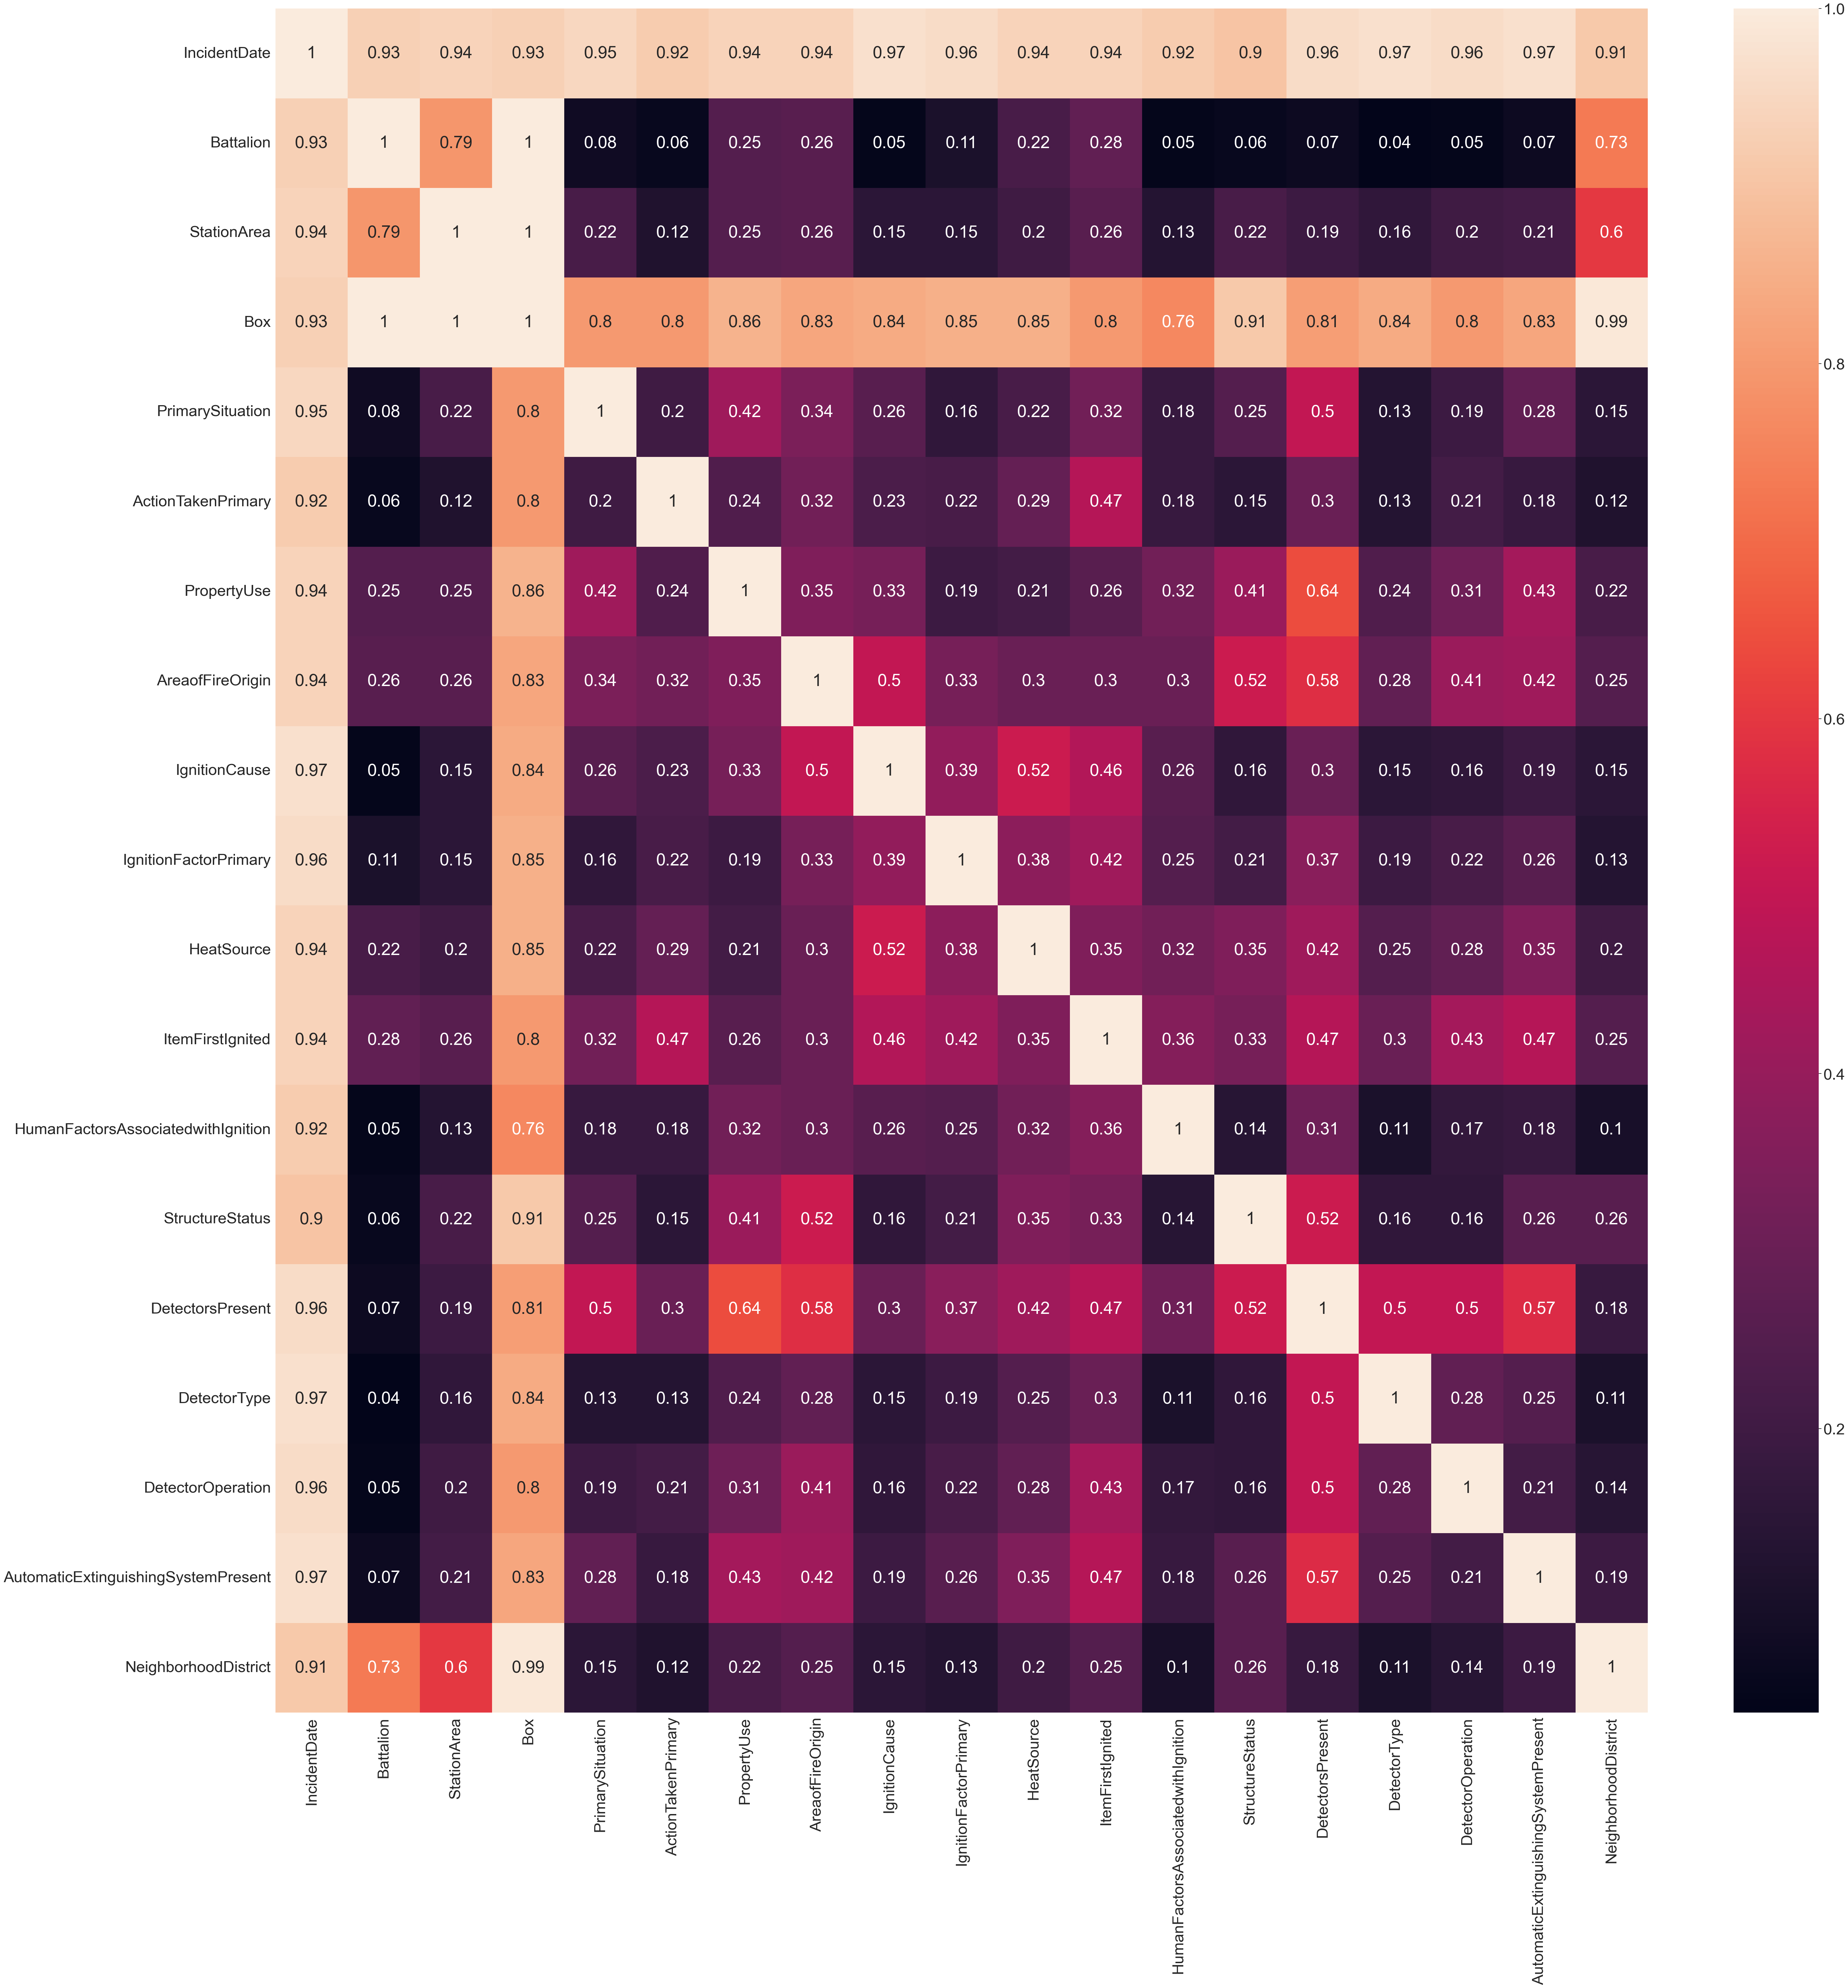

In [78]:
# generating 2-D 10x10 matrix of random numbers
# from 1 to 100
data = np.random.randint(low=1,
                         high=100,
                         size=(10, 10))

# setting the parameter values
annot = True

# plotting the heatmap
sns.set(rc={'figure.figsize':(65,65)})
sns.set(font_scale=3)
hm = sns.heatmap(data=df,
                 annot=annot)

# displaying the plotted heatmap
plt.show()

In [79]:
df = pd.read_csv("sf_fire_only_incidents.csv")

In [80]:
df

IncidentDate  Zipcode Battalion  StationArea   Box  SuppressionUnits  \
0     03/16/2016    94103       B02           36  3212                 9   
1     04/02/2015    94133       B01           28  1434                 9   
2     11/10/2015    94109       B04           38  3325                 3   
3     12/29/2015    94122       B08           22  7325                17   
4     06/09/2015    94114       B05            6  5131                 8   
..           ...      ...       ...          ...   ...               ...   
236   06/21/2013    94124       B10           17  6653                 3   
237   01/14/2014    94122       B08           23  7655                 9   
238   07/23/2007    94107       B03           29  2274                 6   
239   08/01/2013    94108       B01           13  1313                 9   
240   07/08/2013    94110       B06           11  5457                 6   

     SuppressionPersonnel  EMSUnits  EMSPersonnel  OtherUnits  ...  \
0                      34         1             2           2  ...   
1                      33         3             5           3  ...   
2                      10         0             0           1  ...   
3                      64         4             6           3  ...   
4                      29         1             2           2  ...   
..                    ...       ...           ...         ...  ...   
236                    10         0             0           0  ...   
237                    31         1             2           1  ...   
238                    23         0             0           0  ...   
239                    31         1             2           1  ...   
240                    23         1             2           0  ...   

        HumanFactorsAssociatedwithIgnition   StructureStatus  \
0                                   n none   2 in normal use   
1                                   n none   2 in normal use   
2                                   n none   2 in normal use   
3                                   n none   2 in normal use   
4                                   n none   2 in normal use   
..                                     ...               ...   
236                               n - none                 -   
237                               n - none  2 -in normal use   
238                               n - none                 -   
239                               n - none                 -   
240  3 - unattended or unsupervised person  2 -in normal use   

     DetectorsPresent                  DetectorType  \
0           1 present                       1 smoke   
1           1 present                       1 smoke   
2           1 present  5 more than one type present   
3           1 present                       1 smoke   
4           1 present                       1 smoke   
..                ...                           ...   
236                 -                             -   
237   u -undetermined                             -   
238                 -                             -   
239                 -                             -   
240   u -undetermined                             -   

                DetectorOperation  AutomaticExtinguishingSystemPresent  \
0             2 detector operated                            1 present   
1                  u undetermined                       n none present   
2             2 detector operated                       u undetermined   
3             2 detector operated             2 partial system present   
4    3 detector failed to operate                       n none present   
..                            ...                                  ...   
236                             -                                    -   
237                             -                      n -none present   
238                             -                                    -   
239                             -                                    -   
240   

In [81]:
cat_columns

Index(['IncidentDate', 'Battalion', 'StationArea', 'Box', 'PrimarySituation',
       'ActionTakenPrimary', 'PropertyUse', 'AreaofFireOrigin',
       'IgnitionCause', 'IgnitionFactorPrimary', 'HeatSource',
       'ItemFirstIgnited', 'HumanFactorsAssociatedwithIgnition',
       'StructureStatus', 'DetectorsPresent', 'DetectorType',
       'DetectorOperation', 'AutomaticExtinguishingSystemPresent',
       'NeighborhoodDistrict'],
      dtype='object')

In [82]:
cat_columns.values

array(['IncidentDate', 'Battalion', 'StationArea', 'Box',
       'PrimarySituation', 'ActionTakenPrimary', 'PropertyUse',
       'AreaofFireOrigin', 'IgnitionCause', 'IgnitionFactorPrimary',
       'HeatSource', 'ItemFirstIgnited',
       'HumanFactorsAssociatedwithIgnition', 'StructureStatus',
       'DetectorsPresent', 'DetectorType', 'DetectorOperation',
       'AutomaticExtinguishingSystemPresent', 'NeighborhoodDistrict'],
      dtype=object)

In [83]:
df[cat_columns.values] = df[cat_columns.values].apply(lambda x: pd.factorize(x)[0])

In [84]:
df

IncidentDate  Zipcode  Battalion  StationArea  Box  SuppressionUnits  \
0               0    94103          0            0    0                 9   
1               1    94133          1            1    1                 9   
2               2    94109          2            2    2                 3   
3               3    94122          3            3    3                17   
4               4    94114          4            4    4                 8   
..            ...      ...        ...          ...  ...               ...   
236           222    94124          9           16   95                 3   
237           204    94122          3            7  190                 9   
238           217    94107          7           30  191                 6   
239           223    94108          1           24  192                 9   
240           224    94110          5            5  193                 6   

     SuppressionPersonnel  EMSUnits  EMSPersonnel  OtherUnits  ...  \
0                      34         1             2           2  ...   
1                      33         3             5           3  ...   
2                      10         0             0           1  ...   
3                      64         4             6           3  ...   
4                      29         1             2           2  ...   
..                    ...       ...           ...         ...  ...   
236                    10         0             0           0  ...   
237                    31         1             2           1  ...   
238                    23         0             0           0  ...   
239                    31         1             2           1  ...   
240                    23         1             2           0  ...   

     HumanFactorsAssociatedwithIgnition  StructureStatus  DetectorsPresent  \
0                                     0                0                 0   
1                                     0                0                 0   
2                                     0                0                 0   
3                                     0                0                 0   
4                                     0                0                 0   
..                                  ...              ...               ...   
236                                   3                2                 2   
237                                   3                1                 3   
238                                   3                2                 2   
239                                   3                2                 2   
240                                   8                1                 3   

     DetectorType  DetectorOperation  AutomaticExtinguishingSystemPresent  \
0               0                  0                                    0   
1               0                  1                                    1   
2               1                  0                                    2   
3               0                  0                                    3   
4               0                  2                                    1   
..            ...                ...                                  ...   
236             7                  5                                    5   
237             7                  5                                    6   
238             7                  5                                    5   
239             7                  5                                    5   
240             7                  5                                    6   

     SupervisorDistrict  NeighborhoodDistrict  Completion Time  Response Time  
0                     6                     0              167              5  
1                     3                     1              478              3  
2                     2                     2               82              5  
3                     5                     3            

In [88]:
corr = df.corr(method='pearson', min_periods=1)
sns.set(rc={'figure.figsize':(100,100)})
sns.set(font_scale=3)
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True)

<AxesSubplot: >

In [86]:
df

IncidentDate  Zipcode  Battalion  StationArea  Box  SuppressionUnits  \
0               0    94103          0            0    0                 9   
1               1    94133          1            1    1                 9   
2               2    94109          2            2    2                 3   
3               3    94122          3            3    3                17   
4               4    94114          4            4    4                 8   
..            ...      ...        ...          ...  ...               ...   
236           222    94124          9           16   95                 3   
237           204    94122          3            7  190                 9   
238           217    94107          7           30  191                 6   
239           223    94108          1           24  192                 9   
240           224    94110          5            5  193                 6   

     SuppressionPersonnel  EMSUnits  EMSPersonnel  OtherUnits  ...  \
0                      34         1             2           2  ...   
1                      33         3             5           3  ...   
2                      10         0             0           1  ...   
3                      64         4             6           3  ...   
4                      29         1             2           2  ...   
..                    ...       ...           ...         ...  ...   
236                    10         0             0           0  ...   
237                    31         1             2           1  ...   
238                    23         0             0           0  ...   
239                    31         1             2           1  ...   
240                    23         1             2           0  ...   

     HumanFactorsAssociatedwithIgnition  StructureStatus  DetectorsPresent  \
0                                     0                0                 0   
1                                     0                0                 0   
2                                     0                0                 0   
3                                     0                0                 0   
4                                     0                0                 0   
..                                  ...              ...               ...   
236                                   3                2                 2   
237                                   3                1                 3   
238                                   3                2                 2   
239                                   3                2                 2   
240                                   8                1                 3   

     DetectorType  DetectorOperation  AutomaticExtinguishingSystemPresent  \
0               0                  0                                    0   
1               0                  1                                    1   
2               1                  0                                    2   
3               0                  0                                    3   
4               0                  2                                    1   
..            ...                ...                                  ...   
236             7                  5                                    5   
237             7                  5                                    6   
238             7                  5                                    5   
239             7                  5                                    5   
240             7                  5                                    6   

     SupervisorDistrict  NeighborhoodDistrict  Completion Time  Response Time  
0                     6                     0              167              5  
1                     3                     1              478              3  
2                     2                     2               82              5  
3                     5                     3            